# Machine Learning

Algorithmen die sich durch das Nutzen von Daten automatisch optimieren

Welche Probleme können mit ML gelöst werden?

Kreditwürdigkeit, Preisvorhersagen, Spamfilter, ...

## Supervised Learning

 - Man kennt Daten aus der Vergangenheit (Quadratmeter von Haus, Anzahl Zimmer, Garten vorhanden, ...)
 - Labeled: Man kennt den gewuenschten Output (Man kennt z.B. Preis zu dem Haus in Vergangenheit verkauft wurde. Man will neuen Verkaufspreis schaetzen)
 - Regression Task: Label das man vorhersagen will ist kontinuierlich (z.B. Euro-Preis)
 - Classification Task: Einordnen in eine bestimmte Kategorie (Handschrifterkennung)

## (Unsupervised Leanrning)

 - Daten gruppieren ohne vorhandenes Label

## Unterteilung der Daten
- y: Label (Wert den wir vorhersagen wollen, z.B. Preis einer Taxifahrt)
- X: Features (Daten die zur Schaetzung herangezogen werden)

### Training-Datensatz vs. Test-Datensatz
- Messen der Zuverlaessigkeit des trainierten Modells
- Trainieren mit Tainingsdatensatz und Verifizierung durch Testdatensatz

# Linear Regression

- Wurde frueher verwendet um besser anhand der Sterne zu navigieren
- 1722: Roger Cotes erkennt dass das Kombinieren von verschiedenen Beobachtungen zu besseren Ergebnissen fuehrt
- 1805: Adrien-Marie Legendre veroeffentlicht Methode der kleinsten Quadrate


### Gradient Descent

#  Scikit learn
- Beihnhaltet viele Machine Learning Algorithmen
- Algorithmen koennen schnell getauscht werden
- Algorithmen muessen nicht bis in die Tiefe verstanden werden
- Pragmatischer Ansatz

- X Training; y Training
- X Test; y Test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

NameError: name 'X' is not defined

In [ ]:
model = from sklearn.model_family import Algorithm

In [ ]:
model.fit(X_train, y_train)

In [11]:
predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
performance = error_metric(y_test, predictions)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [43]:
p=0.01
df = pd.read_csv('green_tripdata_2019-02.csv', parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], header=0, skiprows=lambda i: i>0 and random.random() > p)

In [47]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
5706,1,2019-02-28 23:04:09,2019-02-28 23:14:09,N,1,129,56,1,2.00,9.0,0.5,0.5,0.00,0.0,NaN,0.3,10.30,1,1,0.00
5707,2,2019-02-28 23:48:46,2019-02-28 23:53:32,N,1,116,42,1,0.97,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2,1,0.00
5708,2,2019-02-28 23:36:26,2019-02-28 23:43:59,N,1,112,80,1,1.53,7.5,0.5,0.5,0.00,0.0,NaN,0.3,8.80,2,1,0.00
5709,2,2019-02-28 23:32:34,2019-02-28 23:38:02,N,1,82,82,1,0.00,5.0,0.5,0.5,1.89,0.0,NaN,0.3,8.19,1,1,0.00
5710,2,2019-02-28 23:12:34,2019-02-28 23:23:22,N,1,244,24,1,5.10,16.0,0.5,0.5,1.95,0.0,NaN,0.3,22.00,1,1,2.75


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               1000 non-null   int64         
 1   lpep_pickup_datetime   1000 non-null   datetime64[ns]
 2   lpep_dropoff_datetime  1000 non-null   datetime64[ns]
 3   store_and_fwd_flag     1000 non-null   object        
 4   RatecodeID             1000 non-null   int64         
 5   PULocationID           1000 non-null   int64         
 6   DOLocationID           1000 non-null   int64         
 7   passenger_count        1000 non-null   int64         
 8   trip_distance          1000 non-null   float64       
 9   fare_amount            1000 non-null   float64       
 10  extra                  1000 non-null   float64       
 11  mta_tax                1000 non-null   float64       
 12  tip_amount             1000 non-null   float64       
 13  toll

In [22]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

In [30]:
df['pickup_hour'].tail(500)


500    2
501    1
502    1
503    1
504    1
      ..
995    4
996    4
997    4
998    4
999    4
Name: pickup_hour, Length: 500, dtype: int64

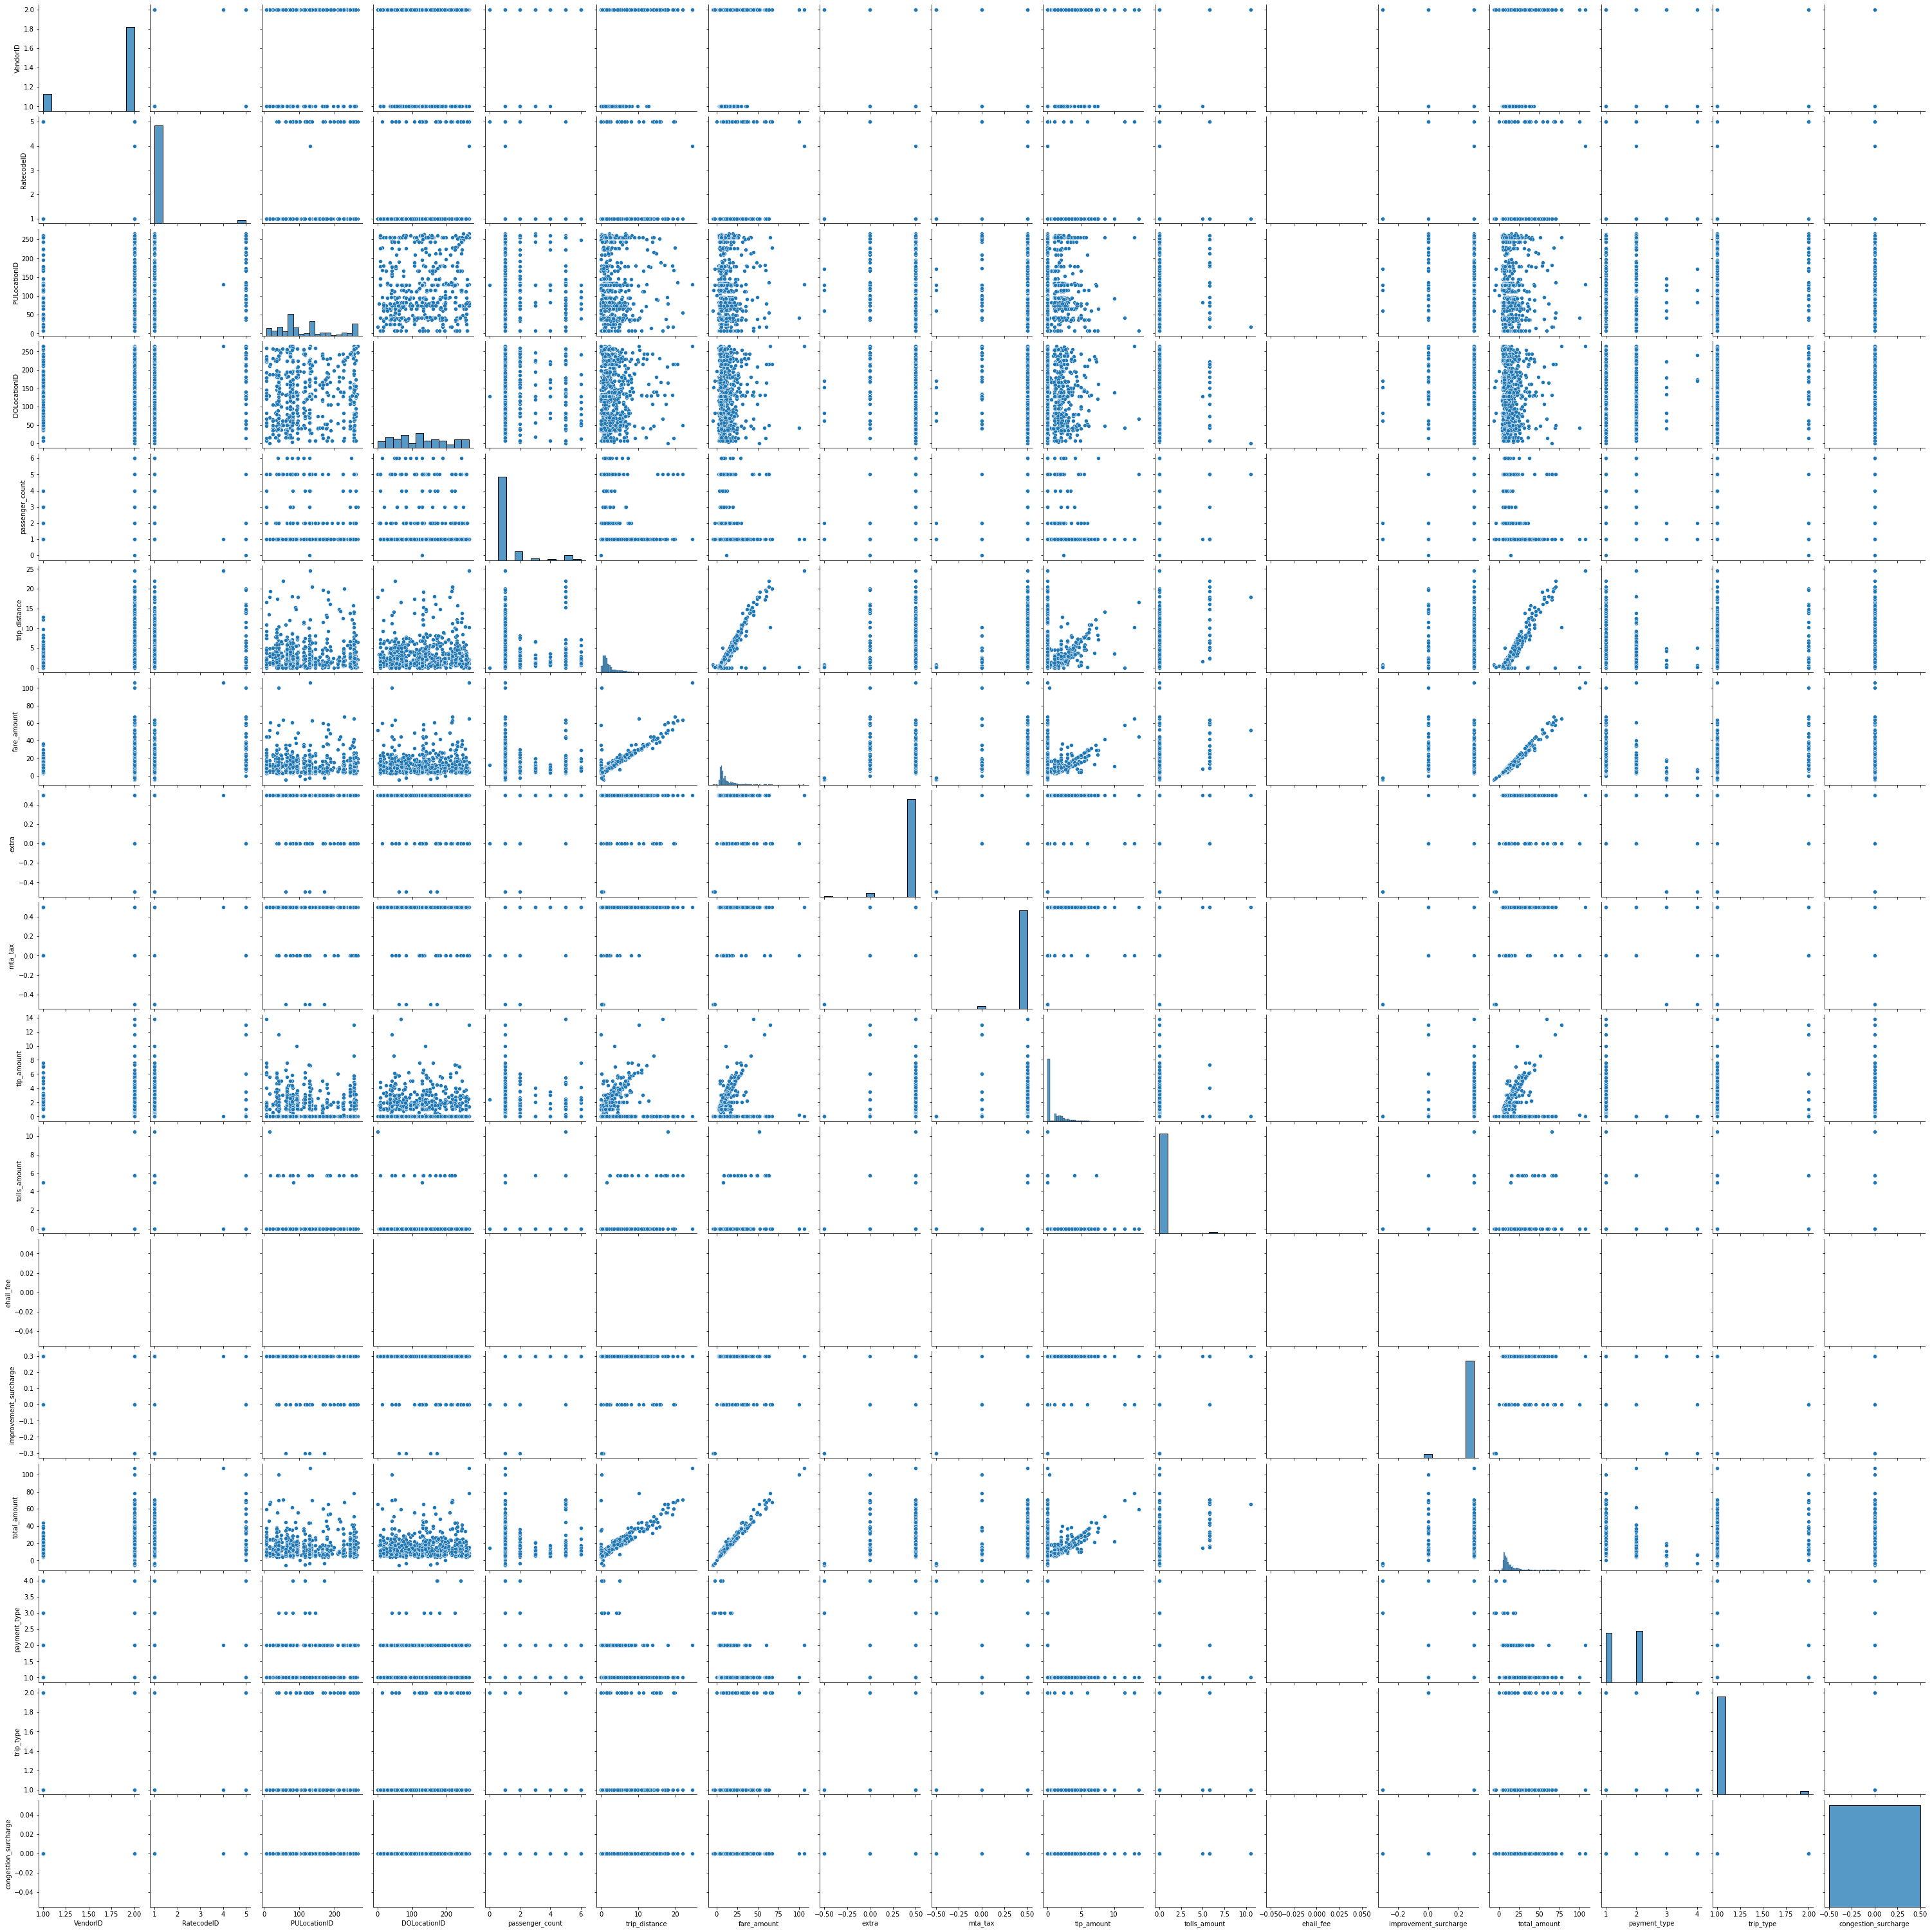

In [8]:
sns.pairplot(df)

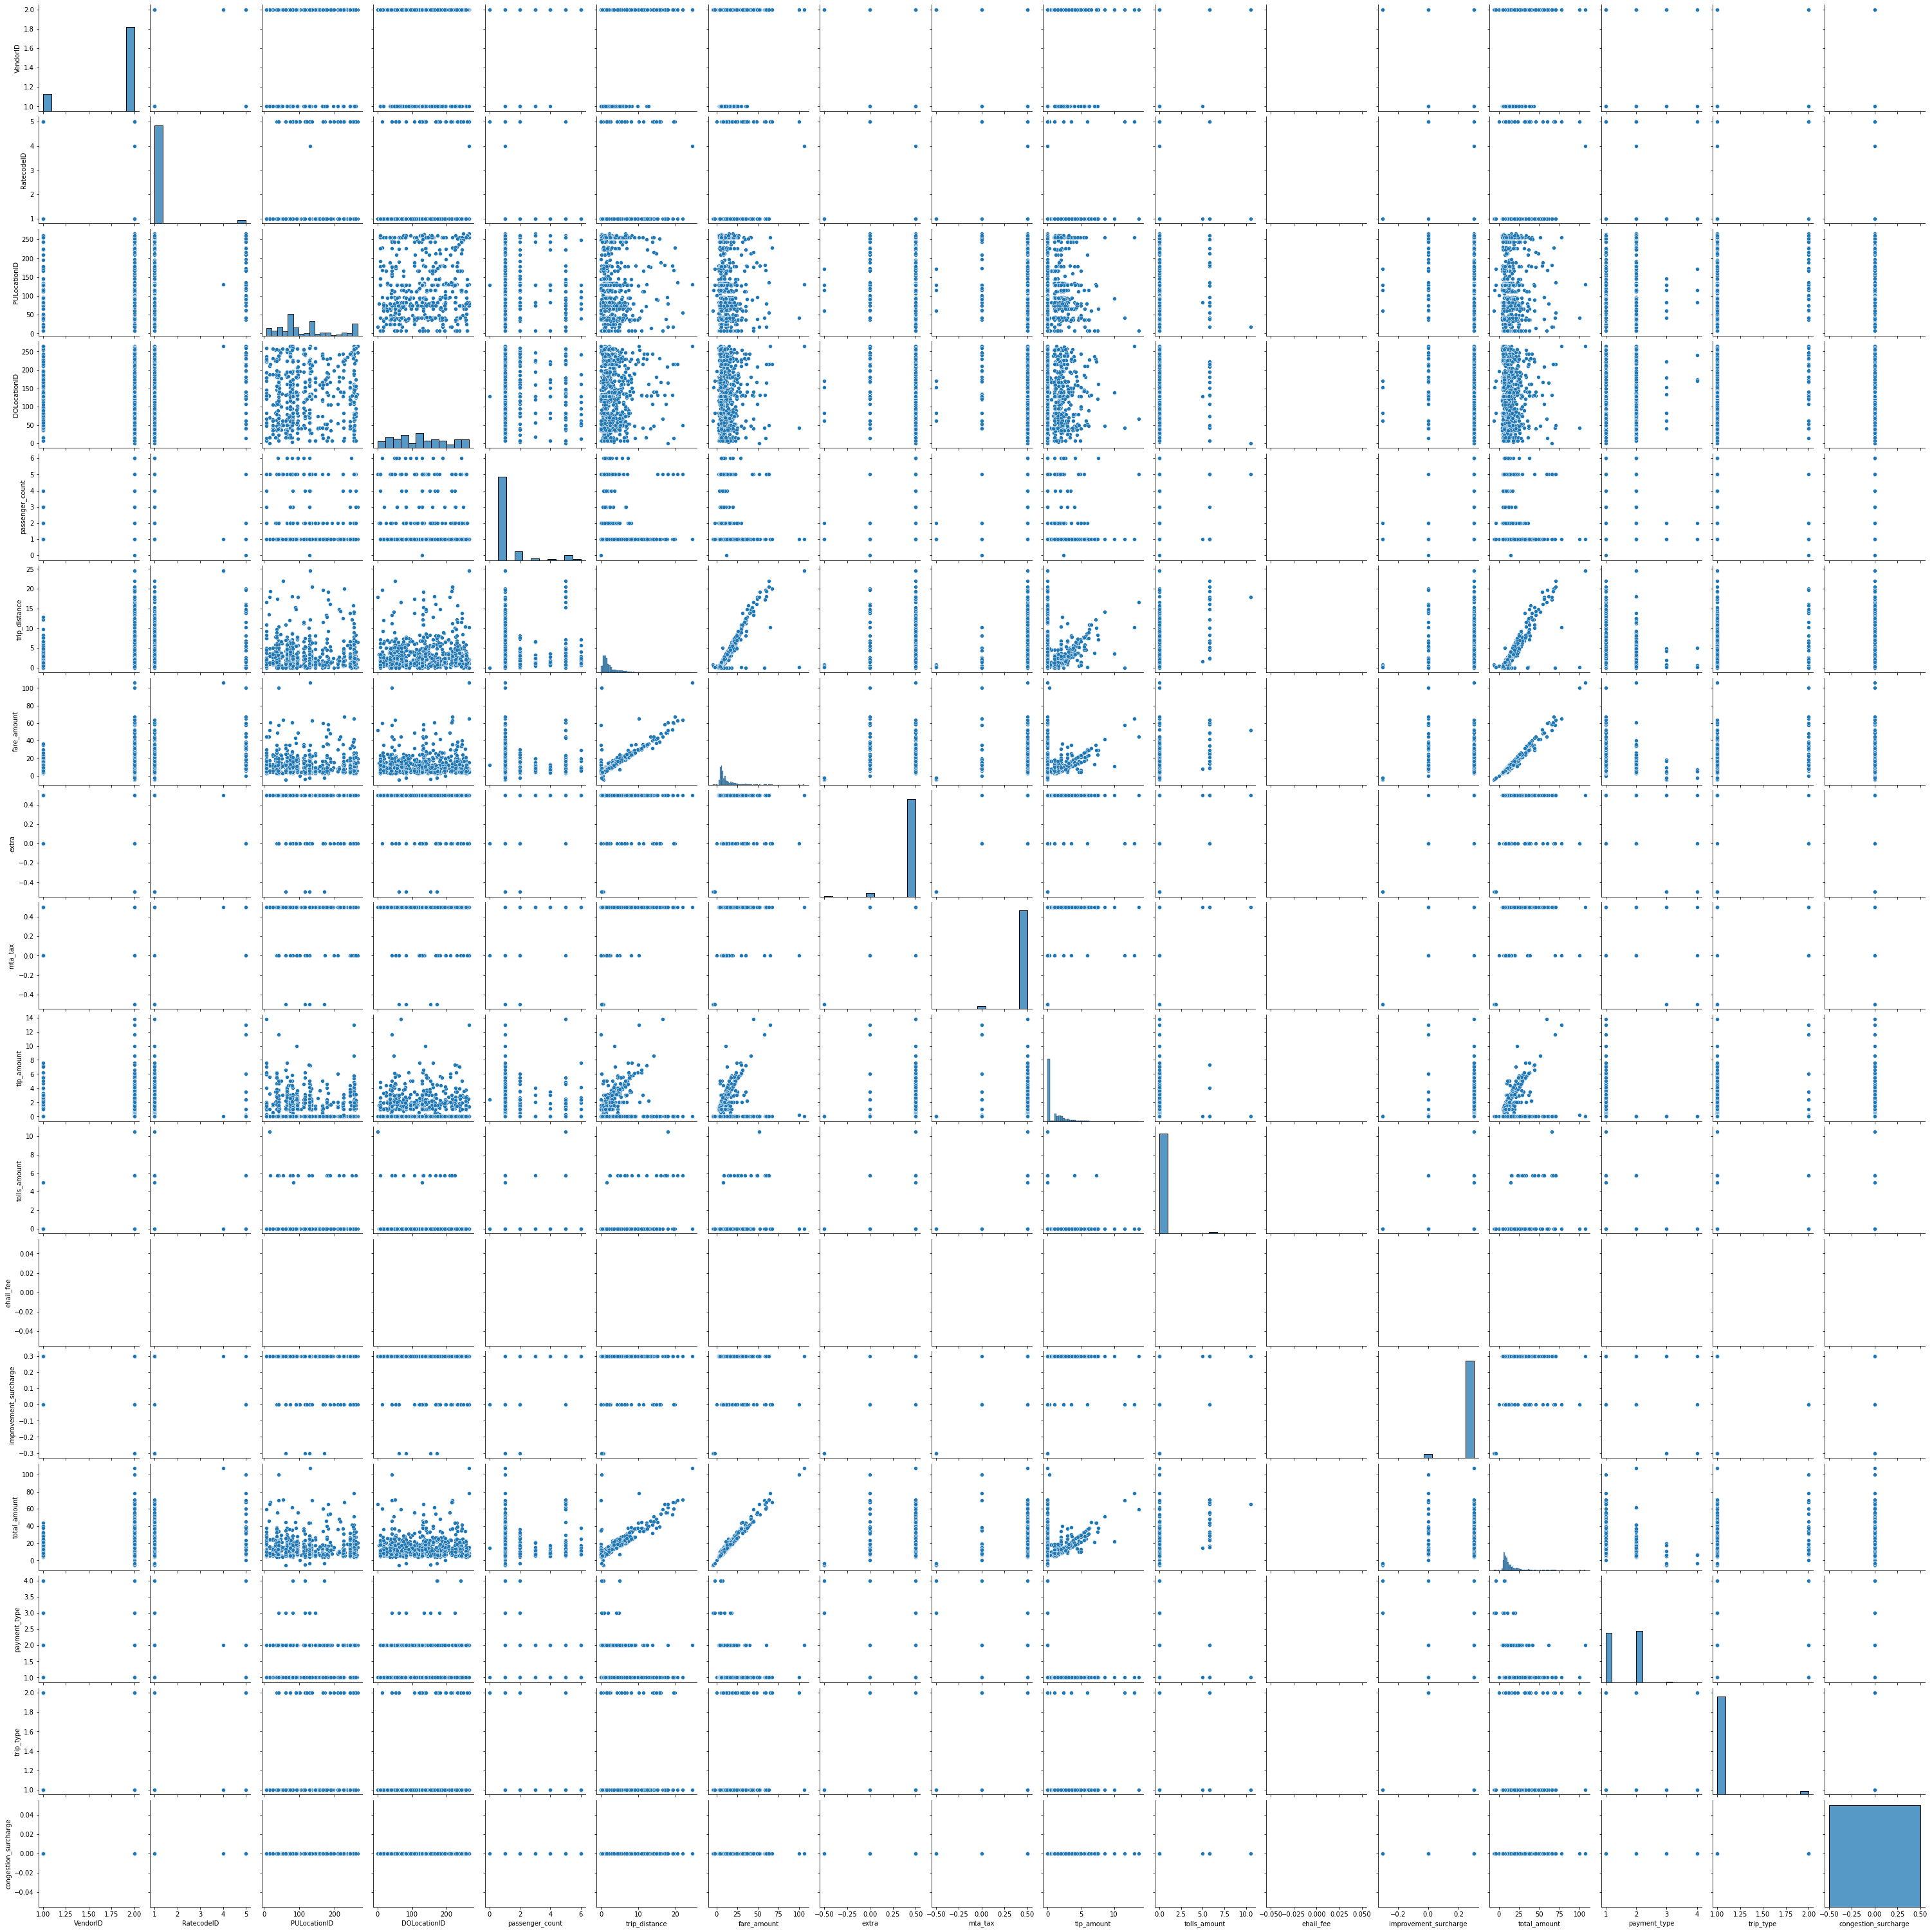

In [9]:
fig = sns.pairplot(df)
fig.savefig("output.png")

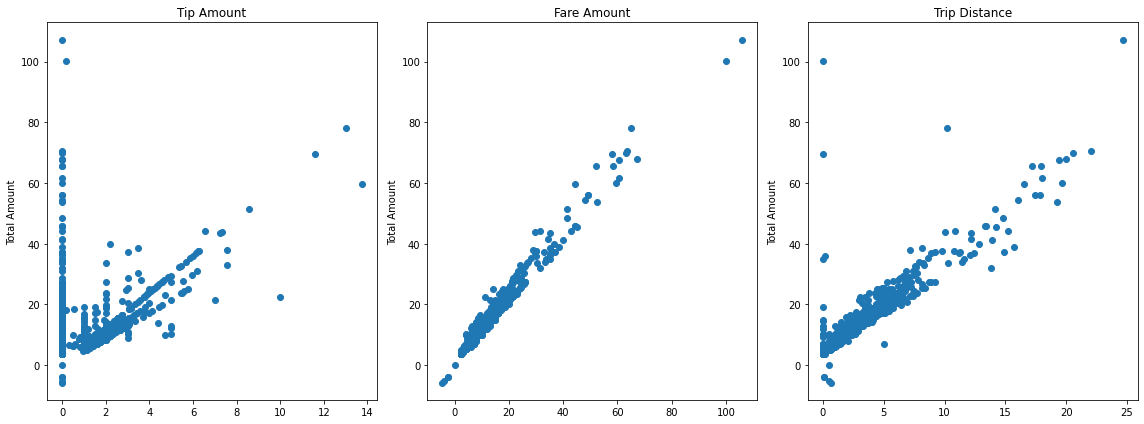

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
axes[0].plot(df['tip_amount'],df['total_amount'],'o')
axes[0].set_ylabel("Total Amount")
axes[0].set_title("Tip Amount")
0
axes[1].plot(df['fare_amount'],df['total_amount'],'o')
axes[1].set_ylabel("Total Amount")
axes[1].set_title("Fare Amount")

axes[2].plot(df['trip_distance'],df['total_amount'],'o')
axes[2].set_ylabel("Total Amount")
axes[2].set_title("Trip Distance")

plt.tight_layout()

In [39]:
X = df[['tip_amount', 'fare_amount', 'trip_distance']]
X

,tip_amount,fare_amount,trip_distance
0,3.08,11.00,2.79
1,3.76,17.50,4.46
2,1.46,6.00,1.26
3,0.00,4.00,0.70
4,0.00,14.50,3.90
...,...,...,...
995,3.16,14.50,4.04
996,0.00,44.94,14.24
997,0.00,36.90,14.85
998,4.14,12.50,3.39


In [35]:
y = df['total_amount']
y

0      15.38
1      22.56
2       8.76
3       5.30
4      15.80
       ...  
995    18.96
996    45.44
997    37.40
998    17.94
999    19.30
Name: total_amount, Length: 1000, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [45]:
len(X_test)

200

In [46]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [51]:
model.predict(X_test)

array([  7.18698806,   8.03244441,   9.82048825,  52.30397019,
         8.0477089 ,   9.68763907,   3.64338416,  37.99737898,
         4.14351436,  19.08206287,   7.7379208 ,   7.8218755 ,
         8.9614917 ,  14.61550153,  17.70214551,  16.0338455 ,
         9.85349529,   5.72404355,   6.2566108 ,   8.25522355,
         7.2721357 ,   9.36042733,  12.00283867,   3.62811967,
         6.79893079,   6.21081733,   6.22989794,   5.65916947,
         5.72404355,  14.24398766,   5.15522314,  22.40747991,
        16.64680674,  17.38436385,  14.34264876,   9.26662396,
        10.37213611,  10.30917008,  12.98247418,   8.00954768,
        11.80491541,   7.76081753,  14.042865  ,   7.24923896,
        30.25313755,  17.43799766,  11.38575295,   5.18002794,
         5.19910855,   4.65509294,   7.74364498,  10.45799887,
        10.49188427,   8.81068754,   7.74936916,   6.83136783,
        20.71246704,   8.31437345,   7.26831957,   6.70713141,
         6.04917777,   6.75292488,  16.30882447,  35.74